## Importing Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 17,7
style.use("ggplot")
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot ,iplot

import folium


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Reading Data

In [3]:
df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

## Preprocessing

In [4]:
df.drop(["Delta_Confirmed","Delta_Recovered", "Delta_Deaths","Last_Updated_Time","State_Notes"], axis = 1, inplace = True)
df.rename(columns = {'Confirmed' : 'Total cases', 'Migrated_Other': 'Migrated_out'},inplace = True)
df.head()

State  Total cases  Recovered  Deaths  Active  \
0                        Total     29938778   28838753  388221  700028   
1  Andaman and Nicobar Islands         7406       7177     127     102   
2               Andhra Pradesh      1850563    1775176   12319   63068   
3            Arunachal Pradesh        33081      30407     159    2515   
4                        Assam       482505     444743    4208   32207   

   Migrated_out State_code  
0         11776         TT  
1             0         AN  
2             0         AP  
3             0         AR  
4          1347         AS

In [5]:
df

State  Total cases  Recovered  Deaths  \
0                                      Total     29938778   28838753  388221   
1                Andaman and Nicobar Islands         7406       7177     127   
2                             Andhra Pradesh      1850563    1775176   12319   
3                          Arunachal Pradesh        33081      30407     159   
4                                      Assam       482505     444743    4208   
5                                      Bihar       719694     706955    9550   
6                                 Chandigarh        61430      60271     806   
7                               Chhattisgarh       990675     968096   13387   
8   Dadra and Nagar Haveli and Daman and Diu        10515      10415       4   
9                                      Delhi      1432292    1405287   24914   
10                                       Goa       164436     158178    2990   
11                                   Gujarat       822334     806193   10032   
12                                   Haryana       767418     755681    9246   
13                          Himachal Pradesh       200410     194249    3426   
14                         Jammu and Kashmir       311794     298911    4252   
15                                 Jharkhand       344543     337848    5099   
16                                 Karnataka      2806453    2645735   33883   
17                                    Kerala      2809395    2690958   12061   
18                                    Ladakh        19805      19300     202   
19                               Lakshadweep         9443       9042      46   
20                            Madhya Pradesh       789261     778280    8767   
21                               Maharashtra      5972781    5719457  117961   
22                                   Manipur        64065      53405    1047   
23                                 Meghalaya        45555      40574     785   
24                                   Mizoram        17605      13390      83   
25                                  Nagaland        24248      21201     469   
26                                    Odisha       880533     840214    3686   
27                                Puducherry       115080     109990    1726   
28                                    Punjab       592303     569056   15826   
29                                 Rajasthan       951105     939131    8895   
30                                    Sikkim        19321      16329     293   
31                          State Unassigned            0          0       0   
32                                Tamil Nadu      2422497    2321928   31197   
33                                 Telangana       613202     591870    3567   
34                                   Tripura        62321      57671     647   
35                             Uttar Pradesh      1704358    1677611   22178   
36                               Uttarakhand       338644     322681    7035   
37                               West Bengal      1481707    1441343   17348   

    Active  Migrated_out State_code  
0   700028         11776         TT  
1      102             0         AN  
2    63068             0         AP  
3     2515             0         AR  
4    32207          1347         AS  
5     3188             1         BR  
6      353             0         CH  
7     9192             0         CT  
8       62            34         DN  
9     2091             0         DL  
10    3268             0         GA  
11    6109             0         GJ  
12    2491             0         HR  
13    2711            24         HP  
14    8631             0         JK  
15    1596             0         JH  
16  126813            22         KA  
17  105940           436         KL  
18     303             0         LA  
19     319            36         LD  
20    2214             0         MP  
21  132241          3122         MH  
22    9613             0         MN  
23    

## Total number of cases in India

In [6]:
Total_cases_overall = df["Total cases"][0]
print("The total number of cases in India:", Total_cases_overall)

The total number of cases in India: 29938778


In [7]:
df.style.background_gradient()

## States in the order of most Total cases

In [8]:
Total_Cases = df.groupby('State')['Total cases'].sum().sort_values(ascending=False).to_frame()
Total_Cases.style.background_gradient(cmap="Reds")

## States in the order of most Active cases

In [9]:
Total_Active_Cases = df.groupby('State')['Active'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases.style.background_gradient(cmap="Reds")

In [10]:
df_plot = df.drop(df.index[0], inplace = False)
sorted_total_case = df_plot.sort_values('Total cases',ascending=False)

## Graphical Representation

## pandas vis

<AxesSubplot:xlabel='State'>

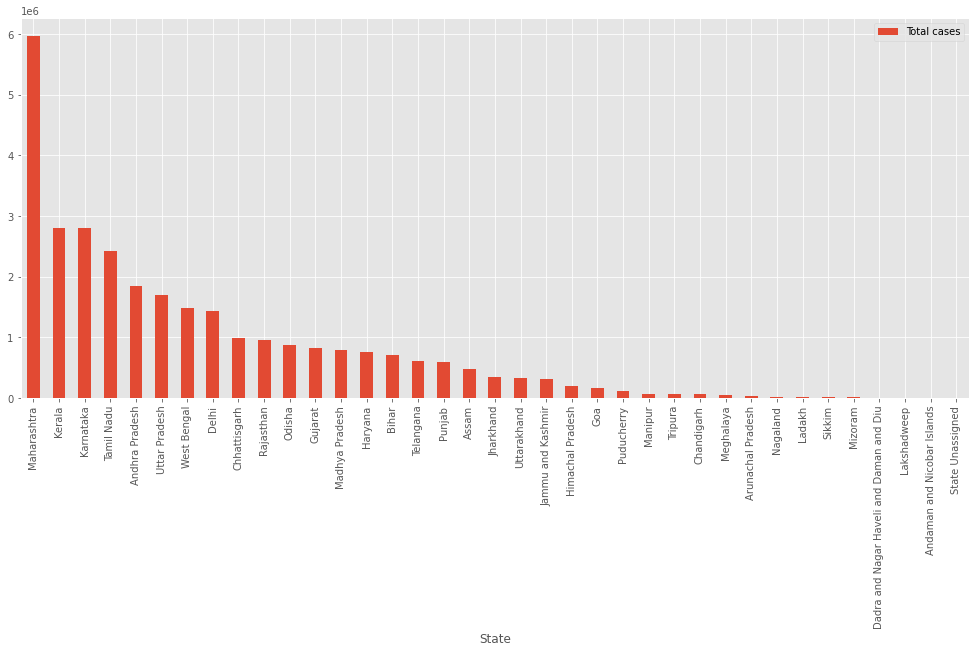

In [11]:
sorted_total_case.plot(kind = 'bar',x = 'State', y = 'Total cases')

## plotly vis

In [12]:
sorted_total_case.iplot(kind = 'bar',x = 'State', y = 'Total cases')

## plotly express

In [13]:
px.bar(sorted_total_case,x = 'State', y = 'Total cases' )


In [14]:
#plotly
fig = go.Figure()
fig.add_trace(go.Bar(x = sorted_total_case['State'], y = sorted_total_case['Total cases']))
fig.update_layout(title = 'Total cases in India', xaxis = dict(title = 'Name of State / UT'),yaxis = dict(title = 'Total Cases'))

### Importing Latitude and Longitude coordinates for each state

In [15]:
Indian_Cord = pd.read_excel("Indian Coordinates1.xlsx")
Indian_Cord

State   Latitude  Longitude
0                Andaman and Nicobar Islands  11.667026  92.735983
1                             Andhra Pradesh  14.750429  78.570026
2                          Arunachal Pradesh  27.100399  93.616601
3                                      Assam  26.749981  94.216667
4                                      Bihar  25.785414  87.479973
5                                 Chandigarh  30.719997  76.780006
6                               Chhattisgarh  22.090420  82.159987
7   Dadra and Nagar Haveli and Daman and Diu  20.266578  73.016618
8                                      Delhi  28.669993  77.230004
9                                        Goa  15.491997  73.818001
10                                   Gujarat  22.310696  73.192635
11                                   Haryana  28.450006  77.019991
12                          Himachal Pradesh  31.100025  77.166597
13                         Jammu and Kashmir  33.450000  76.240000
14                                 Jharkhand  23.800393  86.419986
15                                 Karnataka  12.570381  76.919997
16                                    Kerala   8.900373  76.569993
17                                    Ladakh  34.100000  77.340000
18                               Lakshadweep  10.562573  72.636867
19                            Madhya Pradesh  21.300391  76.130019
20                               Maharashtra  19.250232  73.160175
21                                   Manipur  24.799971  93.950017
22                                 Meghalaya  25.570492  91.880014
23                                   Mizoram  23.710399  92.720015
24                                  Nagaland  25.666998  94.116570
25                                    Odisha  19.820430  85.900017
26                                Puducherry  11.934994  79.830000
27                                    Punjab  31.519974  75.980003
28                                 Rajasthan  26.449999  74.639981
29                                    Sikkim  27.333330  88.616647
30                                Tamil Nadu  12.920386  79.150042
31                                 Telangana  18.112400  79.019300
32                                   Tripura  23.835404  91.279999
33                             Uttar Pradesh  27.599981  78.050006
34                               Uttarakhand  30.320409  78.050006
35                               West Bengal  22.580390  88.329947

In [16]:
Indian_Cord.rename(columns = {'Name of State / UT' : 'State'},inplace = True)
Indian_Cord

State   Latitude  Longitude
0                Andaman and Nicobar Islands  11.667026  92.735983
1                             Andhra Pradesh  14.750429  78.570026
2                          Arunachal Pradesh  27.100399  93.616601
3                                      Assam  26.749981  94.216667
4                                      Bihar  25.785414  87.479973
5                                 Chandigarh  30.719997  76.780006
6                               Chhattisgarh  22.090420  82.159987
7   Dadra and Nagar Haveli and Daman and Diu  20.266578  73.016618
8                                      Delhi  28.669993  77.230004
9                                        Goa  15.491997  73.818001
10                                   Gujarat  22.310696  73.192635
11                                   Haryana  28.450006  77.019991
12                          Himachal Pradesh  31.100025  77.166597
13                         Jammu and Kashmir  33.450000  76.240000
14                                 Jharkhand  23.800393  86.419986
15                                 Karnataka  12.570381  76.919997
16                                    Kerala   8.900373  76.569993
17                                    Ladakh  34.100000  77.340000
18                               Lakshadweep  10.562573  72.636867
19                            Madhya Pradesh  21.300391  76.130019
20                               Maharashtra  19.250232  73.160175
21                                   Manipur  24.799971  93.950017
22                                 Meghalaya  25.570492  91.880014
23                                   Mizoram  23.710399  92.720015
24                                  Nagaland  25.666998  94.116570
25                                    Odisha  19.820430  85.900017
26                                Puducherry  11.934994  79.830000
27                                    Punjab  31.519974  75.980003
28                                 Rajasthan  26.449999  74.639981
29                                    Sikkim  27.333330  88.616647
30                                Tamil Nadu  12.920386  79.150042
31                                 Telangana  18.112400  79.019300
32                                   Tripura  23.835404  91.279999
33                             Uttar Pradesh  27.599981  78.050006
34                               Uttarakhand  30.320409  78.050006
35                               West Bengal  22.580390  88.329947

In [37]:
df_plot.sort_values(by=['State'], ascending=True, inplace = True)
df_full = pd.merge(Indian_Cord, df_plot,on='State')
df_full

State   Latitude  Longitude  \
0                Andaman and Nicobar Islands  11.667026  92.735983   
1                             Andhra Pradesh  14.750429  78.570026   
2                          Arunachal Pradesh  27.100399  93.616601   
3                                      Assam  26.749981  94.216667   
4                                      Bihar  25.785414  87.479973   
5                                 Chandigarh  30.719997  76.780006   
6                               Chhattisgarh  22.090420  82.159987   
7   Dadra and Nagar Haveli and Daman and Diu  20.266578  73.016618   
8                                      Delhi  28.669993  77.230004   
9                                        Goa  15.491997  73.818001   
10                                   Gujarat  22.310696  73.192635   
11                                   Haryana  28.450006  77.019991   
12                          Himachal Pradesh  31.100025  77.166597   
13                         Jammu and Kashmir  33.450000  76.240000   
14                                 Jharkhand  23.800393  86.419986   
15                                 Karnataka  12.570381  76.919997   
16                                    Kerala   8.900373  76.569993   
17                                    Ladakh  34.100000  77.340000   
18                               Lakshadweep  10.562573  72.636867   
19                            Madhya Pradesh  21.300391  76.130019   
20                               Maharashtra  19.250232  73.160175   
21                                   Manipur  24.799971  93.950017   
22                                 Meghalaya  25.570492  91.880014   
23                                   Mizoram  23.710399  92.720015   
24                                  Nagaland  25.666998  94.116570   
25                                    Odisha  19.820430  85.900017   
26                                Puducherry  11.934994  79.830000   
27                                    Punjab  31.519974  75.980003   
28                                 Rajasthan  26.449999  74.639981   
29                                    Sikkim  27.333330  88.616647   
30                                Tamil Nadu  12.920386  79.150042   
31                                 Telangana  18.112400  79.019300   
32                                   Tripura  23.835404  91.279999   
33                             Uttar Pradesh  27.599981  78.050006   
34                               Uttarakhand  30.320409  78.050006   
35                               West Bengal  22.580390  88.329947   

    Total cases  Recovered  Deaths  Active  Migrated_out State_code  
0          7406       7177     127     102             0         AN  
1       1850563    1775176   12319   63068             0         AP  
2         33081      30407     159    2515             0         AR  
3        482505     444743    4208   32207          1347         AS  
4        719694     706955    9550    3188             1         BR  
5         61430      60271     806     353             0         CH  
6        990675     968096   13387    9192             0         CT  
7         10515      10415       4      62            34         DN  
8       1432292    1405287   24914    2091             0         DL  
9        164436     158178    2990    3268             0         GA  
10       822334     806193   10032    6109             0         GJ  
11       767418     755681    9246    2491             0         HR  
12       200410     194249    3426    2711            24         HP  
13       311794     298911    4252    8631             0         JK  
14       344543     337848    5099    1596             0         JH  
15      2806453    2645735   33883  126813            22         KA  
16      2809395    2690958   12061  105940           436         KL  
17        19805      19300     202     303             0         LA  
18         9443       9042      46     319            36         LD  
19       789261     778280    8767    2214      

In [38]:
map_ = folium.Map(location=[20,70],zoom_start=4.3)
folium.TileLayer('Stamenterrain').add_to(map_)

In [39]:
for lat, lon, val, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total cases'],df_full['State']):
    folium.CircleMarker([lat,lon], radius = val*0.005*0.004, popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>'+str(val)+'<br>'), color = "red",fill_color='red', fill_opacity = 0.2).add_to(map_)

In [40]:
map_

In [41]:
dbd_India = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [42]:
dbd_India

Date    Date_YMD     Status     TT  AN    AP   AR    AS   BR  CH  \
0     14-Mar-20  2020-03-14  Confirmed     81   0     1    0     0    0   0   
1     14-Mar-20  2020-03-14  Recovered      9   0     0    0     0    0   0   
2     14-Mar-20  2020-03-14   Deceased      2   0     0    0     0    0   0   
3     15-Mar-20  2020-03-15  Confirmed     27   0     0    0     0    0   0   
4     15-Mar-20  2020-03-15  Recovered      4   0     0    0     0    0   0   
...         ...         ...        ...    ...  ..   ...  ...   ...  ...  ..   
1387  19-Jun-21  2021-06-19  Recovered  87608  34  8014  229  5141  494  78   
1388  19-Jun-21  2021-06-19   Deceased   1574   0    45    0    40    7   2   
1389  20-Jun-21  2021-06-20  Confirmed  52978  12  5646  158  1775  294  27   
1390  20-Jun-21  2021-06-20  Recovered  78189  15  7772  244  3559  494  70   
1391  20-Jun-21  2021-06-20   Deceased   1424   0    50    0    30    7   0   

      ...    PB   RJ   SK     TN    TG   TR   UP   UT    WB  UN  
0     ...     1    3    0      1     1    0   12    0     0   0  
1     ...     0    1    0      0     0    0    4    0     0   0  
2     ...     0    0    0      0     0    0    0    0     0   0  
3     ...     0    1    0      0     2    0    1    0     0   0  
4     ...     0    2    0      0     1    0    0    0     0   0  
...   ...   ...  ...  ...    ...   ...  ...  ...  ...   ...  ..  
1387  ...  1315  518  299  18232  1813  595  592  217  2109   0  
1388  ...    31    7    1    180    10    5   51    9    55   0  
1389  ...   541  144   87   7817  1006  367  219  136  2184   0  
1390  ...  1173  512  139  17043  1798  661  561  206  2128   0  
1391  ...    24    4    2    182    11    4   46    9    53   0  

[1392 rows x 42 columns]

In [43]:
def preprocessing(dataframe,Status):
    df = dataframe[dataframe["Status"]==Status]
    df.drop(["Status"], axis =1, inplace = True)
    df.reset_index(drop=True, inplace=True)
    df = df.melt(id_vars=["Date", "Date_YMD"], var_name="State", value_name=Status)
    return df

In [44]:
conf_dbd_India = preprocessing(s,"Confirmed")
rec_dbd_India = preprocessing(dbd_India,"Recovered")
dec_dbd_India = preprocessing(dbd_India,"Deceased")

In [45]:
pd1 = pd.merge(conf_dbd_India, rec_dbd_India)
dbd = pd.merge(pd1, dec_dbd_India)
dbd.rename(columns = {'State' : 'State_code'},inplace = True)

index_names = dbd[ (dbd["State_code"] == "TT")|(dbd["State_code"] == "UN")].index 
dbd_State = dbd.drop(index_names)

dbd_State

Date    Date_YMD State_code  Confirmed  Recovered  Deceased
464    14-Mar-20  2020-03-14         AN          0          0         0
465    15-Mar-20  2020-03-15         AN          0          0         0
466    16-Mar-20  2020-03-16         AN          0          0         0
467    17-Mar-20  2020-03-17         AN          0          0         0
468    18-Mar-20  2020-03-18         AN          0          0         0
...          ...         ...        ...        ...        ...       ...
17627  16-Jun-21  2021-06-16         WB       3187       2012        69
17628  17-Jun-21  2021-06-17         WB       3018       2033        64
17629  18-Jun-21  2021-06-18         WB       2788       2112        58
17630  19-Jun-21  2021-06-19         WB       2486       2109        55
17631  20-Jun-21  2021-06-20         WB       2184       2128        53

[17168 rows x 6 columns]

In [46]:
df1 = df_full[["State_code", "State","Latitude", "Longitude"]]
Statewise_daily = pd.merge(dbd_State, df1)
Statewise_daily

Date    Date_YMD State_code  Confirmed  Recovered  Deceased  \
0      14-Mar-20  2020-03-14         AN          0          0         0   
1      15-Mar-20  2020-03-15         AN          0          0         0   
2      16-Mar-20  2020-03-16         AN          0          0         0   
3      17-Mar-20  2020-03-17         AN          0          0         0   
4      18-Mar-20  2020-03-18         AN          0          0         0   
...          ...         ...        ...        ...        ...       ...   
16699  16-Jun-21  2021-06-16         WB       3187       2012        69   
16700  17-Jun-21  2021-06-17         WB       3018       2033        64   
16701  18-Jun-21  2021-06-18         WB       2788       2112        58   
16702  19-Jun-21  2021-06-19         WB       2486       2109        55   
16703  20-Jun-21  2021-06-20         WB       2184       2128        53   

                             State   Latitude  Longitude  
0      Andaman and Nicobar Islands  11.667026  92.735983  
1      Andaman and Nicobar Islands  11.667026  92.735983  
2      Andaman and Nicobar Islands  11.667026  92.735983  
3      Andaman and Nicobar Islands  11.667026  92.735983  
4      Andaman and Nicobar Islands  11.667026  92.735983  
...                            ...        ...        ...  
16699                  West Bengal  22.580390  88.329947  
16700                  West Bengal  22.580390  88.329947  
16701                  West Bengal  22.580390  88.329947  
16702                  West Bengal  22.580390  88.329947  
16703                  West Bengal  22.580390  88.329947  

[16704 rows x 9 columns]

In [47]:
fig = px.density_mapbox(Statewise_daily, lat = "Latitude", lon = "Longitude",hover_name = "State", hover_data = ["Confirmed", "Deceased","Recovered"], animation_frame = "Date", color_continuous_scale = "Portland",radius=7,zoom=4,height=700 )
fig.update_layout(title = "India CoronaVirus Cases")
fig.update_layout(mapbox_style= "open-street-map",mapbox_center_lon=0)
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})

In [48]:
conf_dbd_India

Date    Date_YMD State  Confirmed
0      14-Mar-20  2020-03-14    TT         81
1      15-Mar-20  2020-03-15    TT         27
2      16-Mar-20  2020-03-16    TT         15
3      17-Mar-20  2020-03-17    TT         11
4      18-Mar-20  2020-03-18    TT         37
...          ...         ...   ...        ...
18091  16-Jun-21  2021-06-16    UN          0
18092  17-Jun-21  2021-06-17    UN          0
18093  18-Jun-21  2021-06-18    UN          0
18094  19-Jun-21  2021-06-19    UN          0
18095  20-Jun-21  2021-06-20    UN          0

[18096 rows x 4 columns]

In [49]:
rec_dbd_India

Date    Date_YMD State  Recovered
0      14-Mar-20  2020-03-14    TT          9
1      15-Mar-20  2020-03-15    TT          4
2      16-Mar-20  2020-03-16    TT          1
3      17-Mar-20  2020-03-17    TT          1
4      18-Mar-20  2020-03-18    TT          0
...          ...         ...   ...        ...
18091  16-Jun-21  2021-06-16    UN          0
18092  17-Jun-21  2021-06-17    UN          0
18093  18-Jun-21  2021-06-18    UN          0
18094  19-Jun-21  2021-06-19    UN          0
18095  20-Jun-21  2021-06-20    UN          0

[18096 rows x 4 columns]

In [50]:
dec_dbd_India

Date    Date_YMD State  Deceased
0      14-Mar-20  2020-03-14    TT         2
1      15-Mar-20  2020-03-15    TT         0
2      16-Mar-20  2020-03-16    TT         0
3      17-Mar-20  2020-03-17    TT         1
4      18-Mar-20  2020-03-18    TT         0
...          ...         ...   ...       ...
18091  16-Jun-21  2021-06-16    UN         0
18092  17-Jun-21  2021-06-17    UN         0
18093  18-Jun-21  2021-06-18    UN         0
18094  19-Jun-21  2021-06-19    UN         0
18095  20-Jun-21  2021-06-20    UN         0

[18096 rows x 4 columns]

## Plotting Daily Cases for States

In [63]:
def Plot_(dataframe,Status,State):
    df = dataframe[dataframe["State_code"]==State]
    df.reset_index(drop=True, inplace=True)
    fig = px.bar(df,x = "Date",y = Status,color= Status,title=f'{Status} Cases in {State}')
    fig.show()
    

In [64]:
Plot_(dbd_State,"Confirmed","TN")

In [65]:
Plot_(dbd_State,"Recovered","TN")

In [66]:
Plot_(dbd_State,"Deceased","TN")